In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score

In [2]:
data_train=pd.read_csv("/content/fraudTest.csv")
data_test=pd.read_csv("/content/fraudTrain.csv")

In [3]:
full_data=pd.concat([data_train, data_test])

In [4]:
full_data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3.526826e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [5]:
full_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 252554 entries, 0 to 159233
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             252554 non-null  int64  
 1   trans_date_trans_time  252554 non-null  object 
 2   cc_num                 252553 non-null  float64
 3   merchant               252553 non-null  object 
 4   category               252553 non-null  object 
 5   amt                    252552 non-null  float64
 6   first                  252552 non-null  object 
 7   last                   252552 non-null  object 
 8   gender                 252552 non-null  object 
 9   street                 252552 non-null  object 
 10  city                   252552 non-null  object 
 11  state                  252552 non-null  object 
 12  zip                    252552 non-null  float64
 13  lat                    252552 non-null  float64
 14  long                   252552 non-null  f

In [6]:
full_data=full_data.dropna()


In [7]:
full_data.isnull().sum()


,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


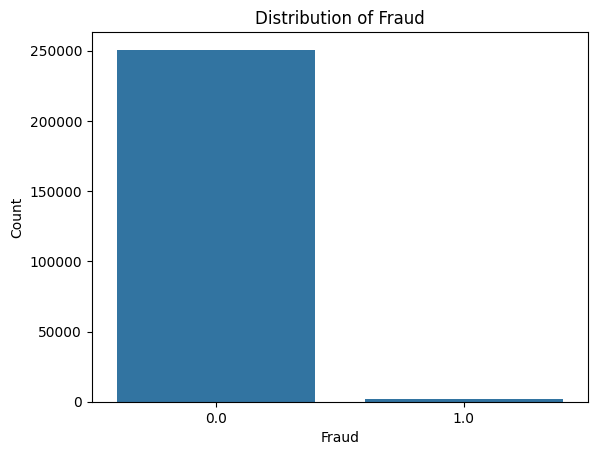

In [8]:
fraud_counts=full_data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()


In [9]:
full_data.duplicated().sum()

0

In [10]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252552 entries, 0 to 159232
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             252552 non-null  int64  
 1   trans_date_trans_time  252552 non-null  object 
 2   cc_num                 252552 non-null  float64
 3   merchant               252552 non-null  object 
 4   category               252552 non-null  object 
 5   amt                    252552 non-null  float64
 6   first                  252552 non-null  object 
 7   last                   252552 non-null  object 
 8   gender                 252552 non-null  object 
 9   street                 252552 non-null  object 
 10  city                   252552 non-null  object 
 11  state                  252552 non-null  object 
 12  zip                    252552 non-null  float64
 13  lat                    252552 non-null  float64
 14  long                   252552 non-null  f

In [11]:
fraud=full_data[full_data["is_fraud"]==1]
not_fraud=full_data[full_data["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])

1830
250722


In [12]:
not_fraud=not_fraud.sample(fraud.shape[0])
data=pd.concat([fraud,not_fraud])

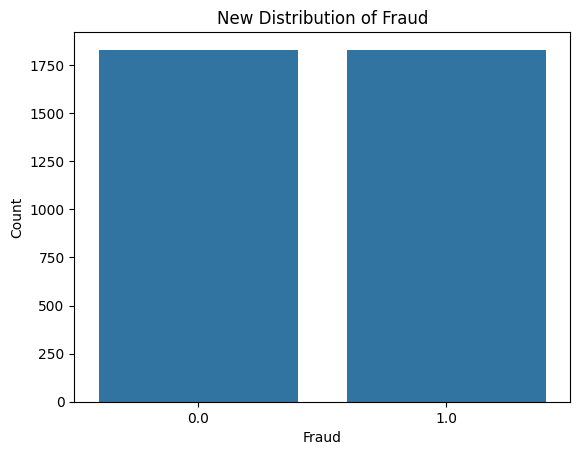

In [13]:
fraud_counts=data['is_fraud'].value_counts()
sns.barplot(x=fraud_counts.index,y=fraud_counts.values)
plt.title('New Distribution of Fraud')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

In [14]:
unused_cols=['Unnamed: 0','first','last','unix_time','street','gender','job','dob','city','state','trans_num','merchant']
data.drop(columns=unused_cols,inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3660 entries, 1685 to 46809
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  3660 non-null   object 
 1   cc_num                 3660 non-null   float64
 2   category               3660 non-null   object 
 3   amt                    3660 non-null   float64
 4   zip                    3660 non-null   float64
 5   lat                    3660 non-null   float64
 6   long                   3660 non-null   float64
 7   city_pop               3660 non-null   float64
 8   merch_lat              3660 non-null   float64
 9   merch_long             3660 non-null   float64
 10  is_fraud               3660 non-null   float64
dtypes: float64(9), object(2)
memory usage: 343.1+ KB


In [16]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)

In [17]:
encoder=LabelEncoder()
data['category']=encoder.fit_transform(data['category'])
data['cc_num']=encoder.fit_transform(data['cc_num'])

In [18]:
data.head()


,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
1685,450,5,24.84,79759.0,31.8599,-102.7413,23.0,32.575873,-102.604290,1.0,21,6,2020,22,6
1767,696,8,780.52,53803.0,42.5545,-90.3508,1306.0,42.461127,-91.147148,1.0,21,6,2020,22,32
1781,696,0,620.33,53803.0,42.5545,-90.3508,1306.0,42.771834,-90.158365,1.0,21,6,2020,22,37
1784,512,11,1077.69,70726.0,30.4590,-90.9027,71335.0,31.204974,-90.261595,1.0,21,6,2020,22,38
1857,450,12,842.65,79759.0,31.8599,-102.7413,23.0,31.315782,-102.736390,1.0,21,6,2020,23,2


In [19]:
scaler=StandardScaler()
data['amt']=scaler.fit_transform(data[['amt']])
data['zip']=scaler.fit_transform(data[['zip']])
data['city_pop']=scaler.fit_transform(data[['city_pop']])
data['cc_num']=encoder.fit_transform(data['cc_num'])

In [20]:
X=data.drop('is_fraud',axis=1)
y=data['is_fraud']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [22]:
RFC=RandomForestClassifier(random_state=0)
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

In [23]:
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))
print('Confusion matrix:',confusion_matrix(y_test, y_pred))

Accuracy: 0.9467213114754098
Precision: 0.958904109589041
Recall: 0.9358288770053476
F1 score: 0.9472259810554804
Confusion matrix: [[343  15]
 [ 24 350]]


Text(0.5, 1.0, 'Confusion Matrix')

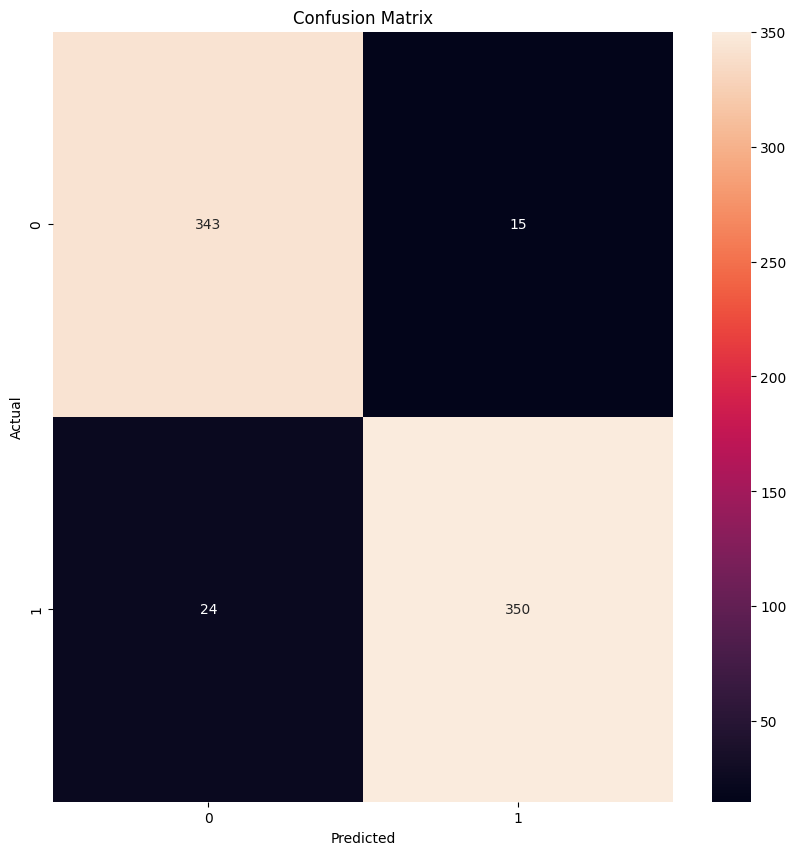

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')